# Visualization of GX460 Prices 
## Data from cars.com on May-03-2024

## Setup

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
cars = pd.read_csv('data/output_May-03-2024_cleaned.csv')

In [3]:
cars.head()

,Title,Miles,Price,Deal,Stock,Year,Make,Model,Sub_Model
0,2014 Lexus GX 460 460,118146,21995,Good,Used,2014,Lexus,GX 460 460,Base
1,2014 Lexus GX 460 Luxury,133167,24744,Fair,Used,2014,Lexus,GX 460 Luxury,Luxury
2,2014 Lexus GX 460 Base,106325,27995,Fair,Used,2014,Lexus,GX 460 Base,Base
3,2014 Lexus GX 460 Base,116480,23987,Fair,Used,2014,Lexus,GX 460 Base,Base
4,2014 Lexus GX 460 Base,96889,29995,Fair,Used,2014,Lexus,GX 460 Base,Base


## Visuallizations

#### Violin and Box plots for 'Year' vs 'Price'

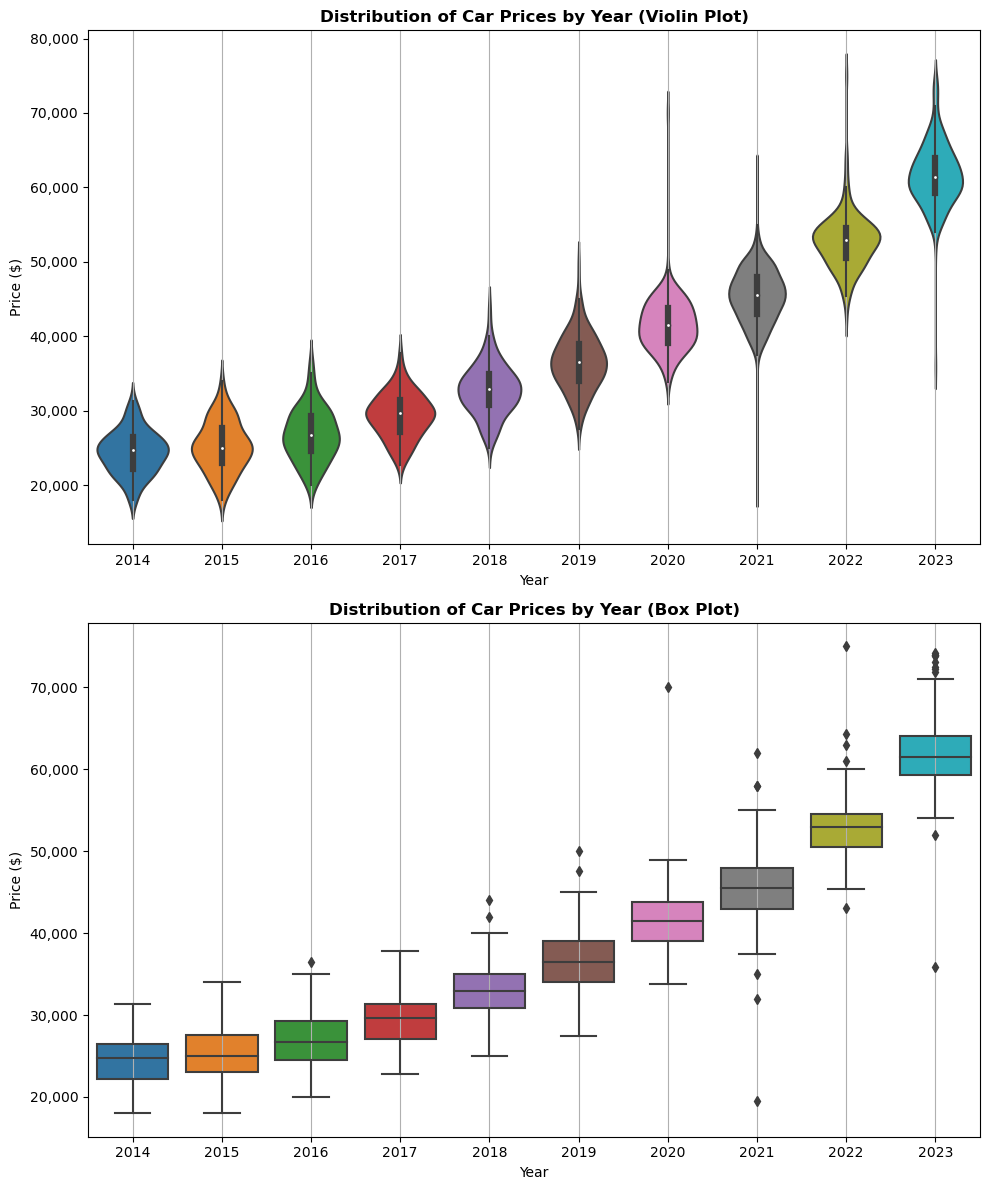

In [97]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Violin plot for 'Year' vs 'Price'
sns.violinplot(data=cars, x='Year', y='Price', ax=axes[0])
axes[0].set_title('Distribution of Car Prices by Year (Violin Plot)', fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price ($)')

# Add formatter for y-axis labels (with commas)
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
axes[0].yaxis.set_major_formatter(formatter)

# Add vertical grid lines to the violin plot
axes[0].grid(axis='x')

# Box plot for 'Year' vs 'Price'
sns.boxplot(data=cars, x='Year', y='Price', ax=axes[1])
axes[1].set_title('Distribution of Car Prices by Year (Box Plot)', fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price ($)')

# Add formatter for y-axis labels (with commas)
axes[1].yaxis.set_major_formatter(formatter)

# Add vertical grid lines to the box plot
axes[1].grid(axis='x')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Car Price vs Miles Driven by Deal Type

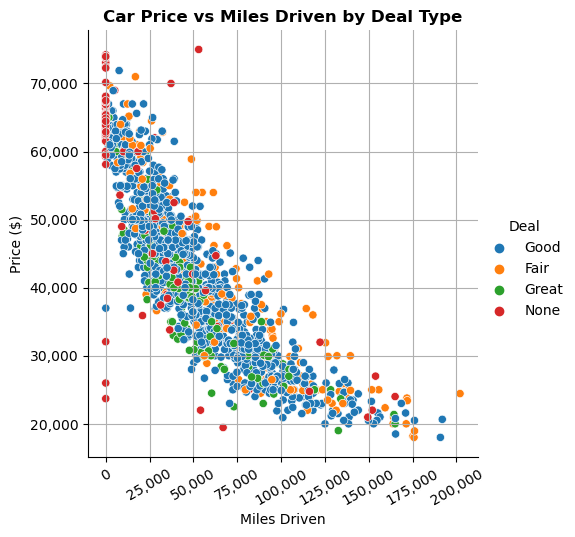

In [90]:
# Create a scatter plot with Seaborn
sns.relplot(data=cars, x='Miles', y='Price', hue="Deal")

# Adding title, labels, and legend
plt.title('Car Price vs Miles Driven by Deal Type', fontweight='bold')
plt.xlabel('Miles Driven')
plt.ylabel('Price ($)')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Format labels with commas
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid lines
plt.grid(True)

plt.show()

#### Car Price vs Miles Driven by Sub Model

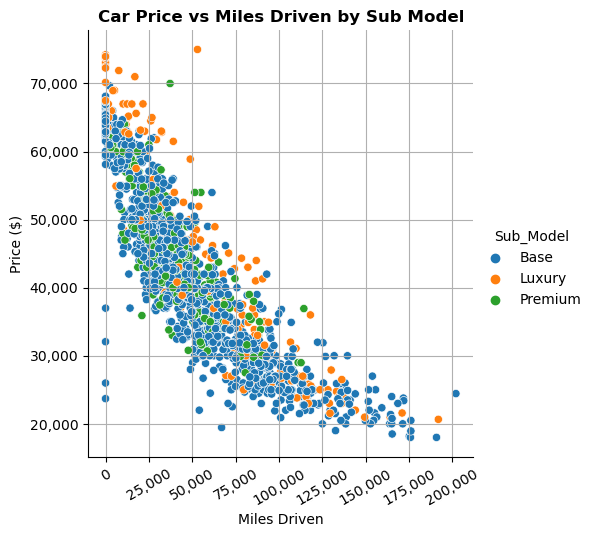

In [72]:
# Create a scatter plot with Seaborn
sns.relplot(data=cars, x='Miles', y='Price', hue="Sub_Model")

# Adding title, labels, and legend
plt.title('Car Price vs Miles Driven by Sub Model', fontweight='bold')
plt.xlabel('Miles Driven')
plt.ylabel('Price ($)')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Format labels with commas
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid lines
plt.grid(True)

plt.show()

#### Car Price vs Miles Driven (Color Coded by Year)

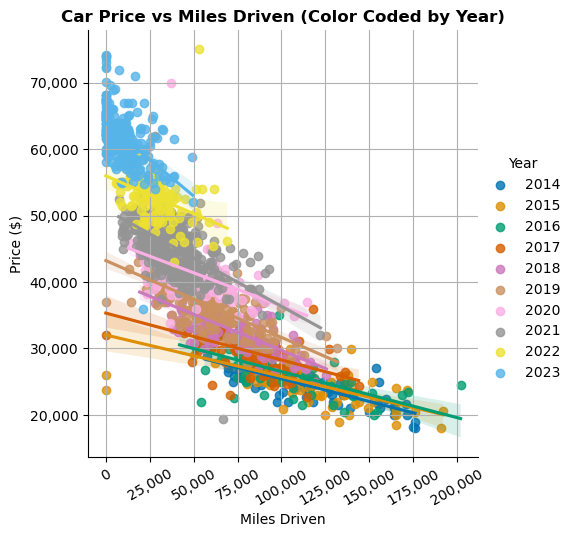

In [71]:
# Create a lmplot with different hues based on "Year"
lm_plot = sns.lmplot(data=cars, x='Miles', y='Price', hue='Year', palette='colorblind')

# Adding title, labels, and legend
plt.title('Car Price vs Miles Driven (Color Coded by Year)', fontweight='bold')
plt.xlabel('Miles Driven')
plt.ylabel('Price ($)')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Format labels with commas
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid lines
plt.grid(True)

plt.show()

#### Linear Jointplot Car Price vs Miles Driven

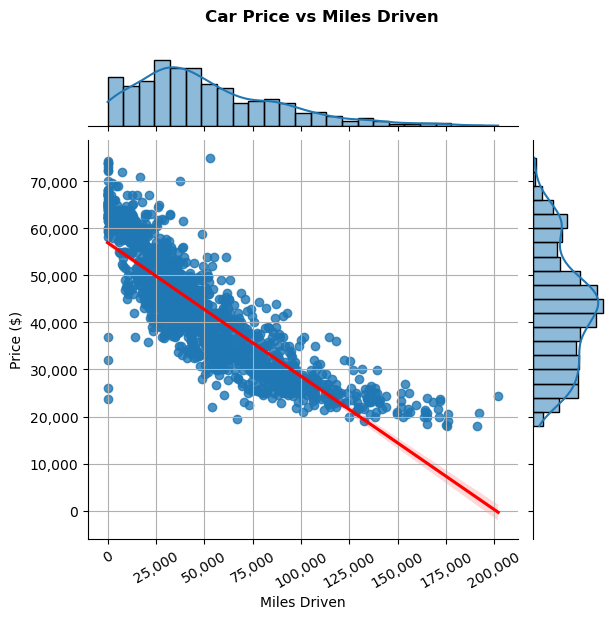

In [70]:
# Create a joint plot with regression line using Seaborn
sns.jointplot(data=cars, x='Miles', y='Price', kind="reg", line_kws={"color": "red"})


# Adding title, labels, and legend
plt.subplots_adjust(top=0.9)  # Adjust subplot spacing for title
plt.suptitle('Car Price vs Miles Driven', fontweight='bold')
plt.xlabel('Miles Driven')
plt.ylabel('Price ($)')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Format labels with commas
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid lines
plt.grid(True)

plt.show()

#### Polynomial Car Price vs Miles Driven

Polynomial Degree 1 - Intercept: -0.284, Slope: 56962.582, Quadratic Term: NA
Polynomial Degree 2 - Intercept: 0.0, Slope: -0.52, Quadratic Term: 62262.072
Polynomial Degree 3 - Intercept: -0.0, Slope: 0.0, Quadratic Term: -0.607
Polynomial Degree 4 - Intercept: 0.0, Slope: -0.0, Quadratic Term: 0.0


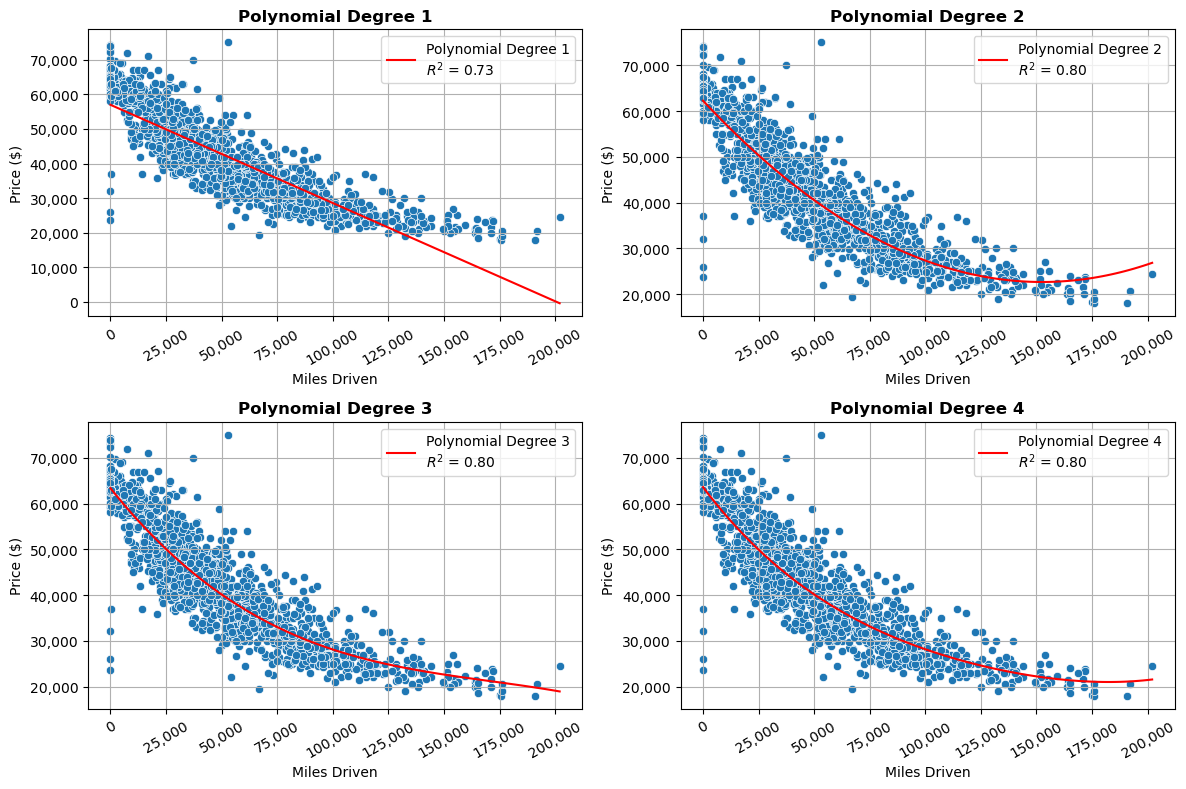

In [83]:
# Define the degrees for polynomial regression
poly_degrees = [1, 2, 3, 4]

# Create a grid of plots for each polynomial degree
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, degree in enumerate(poly_degrees):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Fit a polynomial regression line
    coefficients = np.polyfit(cars['Miles'], cars['Price'], degree)
    poly = np.poly1d(coefficients)

    # Calculate R-squared value
    predicted_prices = poly(cars['Miles'])
    r_squared = r2_score(cars['Price'], predicted_prices)

    # Create a scatter plot with Seaborn
    sns.scatterplot(data=cars, x='Miles', y='Price', ax=ax)

    # Plot the polynomial regression line
    x_values = np.linspace(cars['Miles'].min(), cars['Miles'].max(), 100)
    ax.plot(x_values, poly(x_values), color='red', label=f'Polynomial Degree {degree}\n$R^2$ = {r_squared:.2f}')

    # Adding title, labels, and legend
    ax.set_title(f'Polynomial Degree {degree}', fontweight='bold')
    ax.set_xlabel('Miles Driven')
    ax.set_ylabel('Price ($)')
    ax.legend()

    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=30)

    # Format labels with commas
    formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)

    # Add grid lines
    ax.grid(True)

    # Display polynomial information
    if degree >= 2:
        intercept = round(poly.coeffs[0], 3)
        slope = round(poly.coeffs[1], 3)
        quadratic_term = round(poly.coeffs[2], 3)
        print(f"Polynomial Degree {degree} - Intercept: {intercept}, Slope: {slope}, Quadratic Term: {quadratic_term}")
    else:
        intercept = round(poly.coeffs[0], 3)
        slope = round(poly.coeffs[1], 3)
        quadratic_term = 'NA'
        print(f"Polynomial Degree {degree} - Intercept: {intercept}, Slope: {slope}, Quadratic Term: {quadratic_term}")

plt.tight_layout()
plt.show()